# Лабораторная №6

##  Вариант №15

In [1]:
import numpy as np
from numpy.linalg import inv, det
import matplotlib.pyplot as plt
%matplotlib inline 

## Аналитический метод

In [2]:
def solve_analytically(matrix_c):
    u = np.ones(matrix_c.shape[0])
    v = 1/(u.dot(inv(matrix_c)).dot(u))
    x_star = u.dot(inv(matrix_c))*v
    y_star = inv(matrix_c).dot(u)*v
    
    return {
        'x_strategies' : x_star,
        'y_strategies' : y_star,
        'v' : v
    }

## Метод Брауна-Робинсон

In [3]:
# выбор стратегий игроков
def brown_robinson_step(a_strats_count, b_strats_count, matrix_c):
    a_gains = matrix_c.dot(b_strats_count)
    b_gains = a_strats_count.dot(matrix_c)
    
    return np.argmax(a_gains), np.argmin(b_gains)

def solve_brown_robinson(matrix_c, requred_epsilon=0, max_steps=100000):
    a_strats_count = np.zeros(matrix_c.shape[0])
    b_strats_count = np.zeros(matrix_c.shape[1])
    
    epsilon_history = []
    epsilon = 0
    
    i = 0
    j = 0
    k = 0
    # Задание числа, заведомо большего чем требуемая погрешность
    epsilon = 2
    
    while k < max_steps and epsilon > requred_epsilon:
        a_strats_count[i] += 1
        b_strats_count[j] += 1
        k += 1
        
        i, j = brown_robinson_step(a_strats_count, b_strats_count, matrix_c)
        
        v_overline = np.max(matrix_c.dot(b_strats_count))
        v_underline = np.min(a_strats_count.dot(matrix_c))
        
        epsilon = v_overline/k - v_underline/k
        epsilon_history.append(epsilon)
        
    return {
        'steps' : k,
        'epsilon' : epsilon,
        'history' : epsilon_history,
        'x_strategies' : a_strats_count / k,
        'y_strategies' : b_strats_count / k,
        'v_overline' : v_overline / k,
        'v_underline' : v_underline / k,
        'iterations' : k
    }

## Решение

### Матрица из примера

In [4]:
C_example = np.array([[2, 1, 3],
              [3, 0, 1],
              [1, 2, 1]])
print(C_example)
print(det(C_example))

[[2 1 3]
 [3 0 1]
 [1 2 1]]
12.0


### Матрица по варианту

In [5]:
C = np.array([[18, 13, 15],
              [ 0, 13, 16],
              [ 1, 17, 12]])
print(C)
print(det(C))

[[18 13 15]
 [ 0 13 16]
 [ 1 17 12]]
-2074.9999999999995


In [6]:
result_br = solve_brown_robinson(C_example, requred_epsilon=0.1)
result_an = solve_analytically(C_example)

### Зависимость погрешности от итерации

Iterations: 101


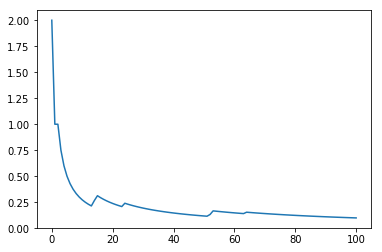

In [19]:
print('Iterations:', result_br['iterations'])
plt.plot(result_br['history'])

### Итоговая погрешность

In [15]:
print('epsilon:', result_br['epsilon'])
print('(v_overline, v_underline):', result_br['v_overline'], result_br['v_underline'])
print('v:', result_an['v'])

epsilon: 0.0990099009900991
(v_overline, v_underline): 1.5148514851485149 1.4158415841584158
v: 1.4999999999999998


### Стратегии игроков

In [16]:
print('Player A strategies:', result_br['x_strategies'], '; sum:', np.sum(result_br['x_strategies']))
print('Player B strategies:', result_br['y_strategies'], '; sum:', np.sum(result_br['y_strategies']))

Player A strategies: [0.2970297  0.05940594 0.64356436] ; sum: 1.0
Player B strategies: [0.47524752 0.5049505  0.01980198] ; sum: 1.0


## Сравнение с аналитическим методом

In [17]:
print(np.abs(result_an['v'] - result_br['v_overline']))
print(np.abs(result_an['v'] - result_br['v_underline']))
print(np.abs(result_an['x_strategies'] - result_br['x_strategies']))
print(np.abs(result_an['y_strategies'] - result_br['y_strategies']))

0.014851485148515087
0.08415841584158401
[0.0470297  0.06559406 0.01856436]
[0.02475248 0.0049505  0.01980198]


Все в пределах прогрешности. Теперь решение варианта

Iterations: 2450
epsilon: 0.09999999999999964
(v_overline, v_underline): 14.014285714285714 13.914285714285715
analitical v: 14.115646258503403
analitical strategies: [ 0.76870748 -0.04761905  0.27891156] [0.02721088 0.4829932  0.48979592]
Player A strategies: [0.77142857 0.         0.22857143] ; sum: 1.0
Player B strategies: [0.20285714 0.79714286 0.        ] ; sum: 1.0
0.10136054421768925
0.2013605442176889
[0.00272109 0.04761905 0.05034014]
[0.17564626 0.31414966 0.48979592]


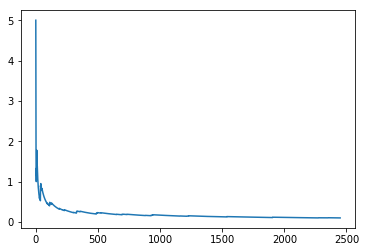

In [23]:
result_br = solve_brown_robinson(C, requred_epsilon=0.1)
result_an = solve_analytically(C)
print('Iterations:', result_br['iterations'])
plt.plot(result_br['history'])
print('epsilon:', result_br['epsilon'])
print('(v_overline, v_underline):', result_br['v_overline'], result_br['v_underline'])
print('analitical v:', result_an['v'])
print('analitical strategies:', result_an['x_strategies'], result_an['y_strategies'])
print('Player A strategies:', result_br['x_strategies'], '; sum:', np.sum(result_br['x_strategies']))
print('Player B strategies:', result_br['y_strategies'], '; sum:', np.sum(result_br['y_strategies']))
print(np.abs(result_an['v'] - result_br['v_overline']))
print(np.abs(result_an['v'] - result_br['v_underline']))
print(np.abs(result_an['x_strategies'] - result_br['x_strategies']))
print(np.abs(result_an['y_strategies'] - result_br['y_strategies']))

1. > `analitical strategies: [ 0.76870748 -0.04761905  0.27891156] [0.02721088 0.4829932  0.48979592]`

    Почему-то выходят отрицательные вероятности
    
2. > `(v_overline, v_underline): 14.014285714285714 13.914285714285715`

    > `analitical v: 14.115646258503403`
    
    $\underline v \leq v \leq \overline v$  не выполняется